# Can we predict business registration?

In [1]:
import pandas as pd 
import numpy as np

# Tratamentos iniciais

1) Lendo os dados 

In [2]:
#A tabela Base_novo_tratamento esta com a coluna porte_municipio com os dados em formato objetc, a tabela Base_novo_tratamento_teste
#esta no formato float64 e a Base_novo_teste esta com a coluna porte_municipio em formato int64

df= pd.read_excel("Base_novo_teste.xlsx")

2) Selecionando as variávies que vamos utilizar

In [3]:
df = df[['qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 1   Mecanismos_incentivo               5568 non-null   object 
 2   Reducao_IPTU                       3484 non-null   object 
 3   Isencao_IPTU                       3484 non-null   object 
 4   Reducao_ISSQN                      3484 non-null   object 
 5   Isencao_ISSQN                      3484 non-null   object 
 6   Isencao_Tx                         3484 non-null   object 
 7   Cessao_terrenos                    3484 non-null   object 
 8   Doacao_terrenos                    3484 non-null   object 
 9   Outros_mecanismos                  3484 non-null   object 
 10  taxa_homicidio                     3890 non-null   float64
 11  RH_adm_dir                         5547 non-null   float

3) Tratamentos iniciais 

Transformando o nome do município no índice da tabela

In [5]:
#df = df.set_index('NMMUN')
df.head()

,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,Outros_mecanismos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,49,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,257,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


Vamos fazer alguns tratamentos para algumas variáveis. 
- Nas variáveis sobre taxa de homicídios, cursos de engenharia ou negócios/direito, vamos transformar os "NA" em 0
- Nas variáveis de políticas municipais, adicionamos "Não" aos "NA"
- Nas variáveis do Enem, substituímos o valor pela mediana

In [6]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [7]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [8]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [9]:
#aqui eu separei as colunas que precisariam passar pelo get_dummies, para que a porte_municipio não fosse modificada junto
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [10]:
df = df[np.isfinite(df).all(1)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 1   taxa_homicidio                     5570 non-null   float64
 2   RH_adm_dir                         5570 non-null   float64
 3   densidade_banda_larga              5570 non-null   float64
 4   densidade_telefonia_movel          5570 non-null   float64
 5   qtd_cursos_engenharias             5570 non-null   float64
 6   qtd_cursos_negocios_direito        5570 non-null   float64
 7   media_notas_CN                     5570 non-null   float64
 8   media_notas_CH                     5570 non-null   float64
 9   media_NU_NOTA_LC                   5570 non-null   float64
 10  media_NU_NOTA_MT                   5570 non-null   float64
 11  media_NU_NOTA_REDACAO              5570 non-null   float

4) Separando variável dependente e variáveis independentes 

In [12]:
X = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
y = df['qtd_abertas_Empresario_Individual']

________________________________________________

# Rodando algoritmos

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=42, stratify = df['porte_municipio'])

# vamos criar uma variável para região do município para usar no stratify. Eu tentei usar a variável SGUF, mas como 
# DF só tem um caso, ele não deixou eu aplicar

In [15]:
#list(X_train.select_dtypes(include = ['float64','int64']))

In [16]:
#df = pd.set_option('display.max_columns', 30)

In [17]:
# https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline
# criei esse procedimento para padronizar o valor das variáveis 

#scaler = StandardScaler()

#numeric_features = list(X_train.select_dtypes(include = ['float64','int64']))

#X_train.loc[:,numeric_features] = scaler.fit_transform(X_train.loc[:,numeric_features])

#X_train.head(30)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3620 entries, 1758 to 3514
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taxa_homicidio                 3620 non-null   float64
 1   RH_adm_dir                     3620 non-null   float64
 2   densidade_banda_larga          3620 non-null   float64
 3   densidade_telefonia_movel      3620 non-null   float64
 4   qtd_cursos_engenharias         3620 non-null   float64
 5   qtd_cursos_negocios_direito    3620 non-null   float64
 6   media_notas_CN                 3620 non-null   float64
 7   media_notas_CH                 3620 non-null   float64
 8   media_NU_NOTA_LC               3620 non-null   float64
 9   media_NU_NOTA_MT               3620 non-null   float64
 10  media_NU_NOTA_REDACAO          3620 non-null   float64
 11  valor_medio_recebido_familia   3620 non-null   int64  
 12  pib_per_capita_preco_corrente  3620 non-null 

In [19]:
#aqui eu exclui a variavel da estratificação pq vc havia dito que ela não entra na hora da predição

X_train = X_train.drop('porte_municipio', axis = 1)
X_test = X_test.drop('porte_municipio', axis = 1)

--------

## 1) Regressão linear

In [20]:
reg = LinearRegression().fit(X_train, y_train)

In [21]:
y_pred = reg.predict(X_test)

In [22]:
mae_rl = mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [23]:
mape_rl = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)

In [24]:
rmse_rl = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

In [25]:
print("MAE:",mae_rl)
print("MAPE:",mape_rl)
print("RMSE:",rmse_rl)

MAE: 159.14248327295553
MAPE: 1.7815855064140447
RMSE: 662.3799243137842


### Validação Cruzada

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
model_lr = LinearRegression()

kfold =  KFold(n_splits = 5, shuffle= True, random_state= 42)

In [28]:
#Testando o modelo

cv_mae = cross_val_score (model_lr, X, y, cv = kfold, scoring='neg_mean_absolute_error')
cv_mape = cross_val_score (model_lr, X, y, cv = kfold, scoring='neg_mean_absolute_percentage_error')
cv_rmse = cross_val_score (model_lr, X, y, cv = kfold, scoring='neg_mean_squared_error')

print("MAE:",-cv_mae)
print("MAPE:",-cv_mape)
print("RMSE:",-cv_rmse)


MAE: [130.74083457 192.08430741 144.80120794 157.9503288  156.01764465]
MAPE: [1.43158345 1.97597118 1.44269431 1.69080965 1.39094507]
RMSE: [ 139225.55966291 1746170.4313627   165131.74298666  505063.09483664
  681707.20590146]


### Curva de Validação

In [29]:
#!pip install yellowbrick

In [30]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import sklearn


#### MAE

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:54

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:54

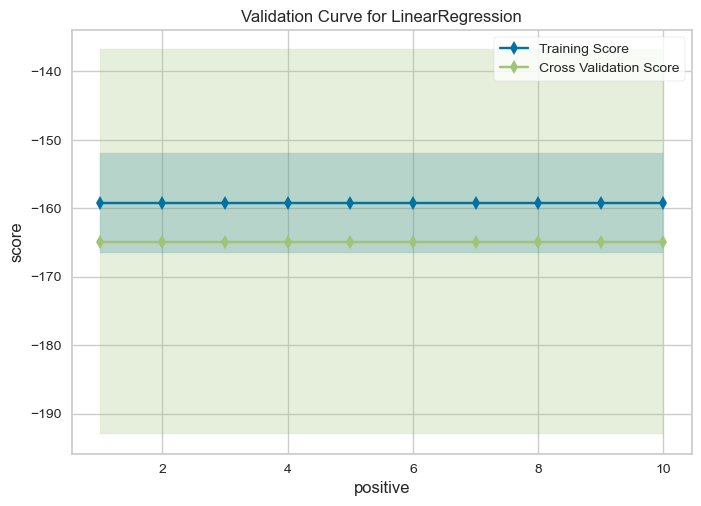

<Axes: title={'center': 'Validation Curve for LinearRegression'}, xlabel='positive', ylabel='score'>

In [31]:
from yellowbrick.model_selection import ValidationCurve

# Load a regression dataset

vc_mae = ValidationCurve(reg, X=X_train,y=y_train,param_name="positive",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mae.fit(X=X_train,y=y_train)

vc_mae.show()


#### MAPE

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:54

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:54

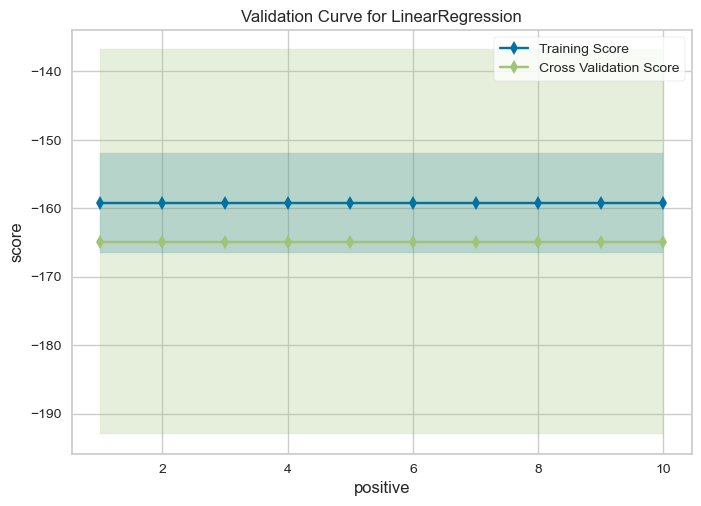

<Axes: title={'center': 'Validation Curve for LinearRegression'}, xlabel='positive', ylabel='score'>

In [32]:
vc_mape = ValidationCurve(reg, X=X_train,y=y_train,param_name="positive",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mape.fit(X=X_train,y=y_train)

vc_mape.show()


#### RMSE

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:54

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:541: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py:54

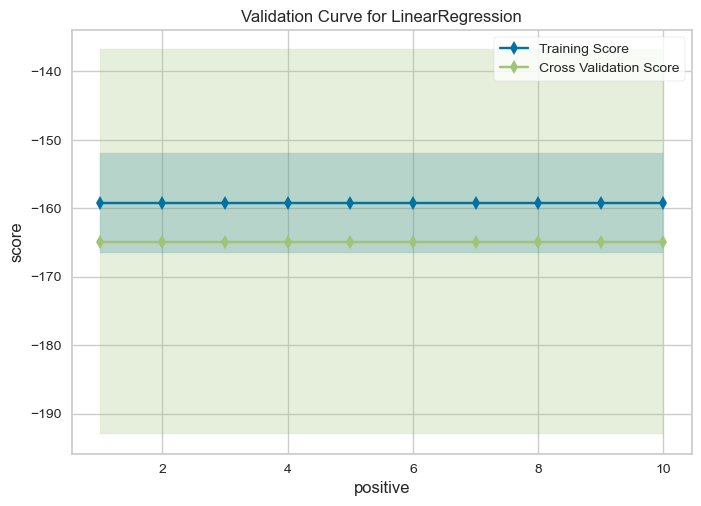

<Axes: title={'center': 'Validation Curve for LinearRegression'}, xlabel='positive', ylabel='score'>

In [33]:
vc_rmse = ValidationCurve(reg, X=X_train,y=y_train,param_name="positive",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_rmse.fit(X=X_train,y=y_train)

vc_rmse.show()

---------

## 2) Regressão ElasticNet

In [34]:
#Elasticnet

from sklearn.linear_model import ElasticNet

enr_model = ElasticNet()

enr_model.fit(X_train, y_train)

test_pred = enr_model.predict(X_test)
train_pred = enr_model.predict(X_train)

#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)


train MAE: 143.3409067447743
test MAE: 156.90686678920565
train MAPE: 1.3511682495956447
test MAPE: 1.3152879773063568
train RMSE: 391.87517011734224
test RMSE: 659.2537496489815


C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.517e+07, tolerance: 8.254e+06
  model = cd_fast.enet_coordinate_descent(


### Validação Cruzada

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
enr_model = ElasticNet()

In [37]:

kfold =  KFold(n_splits = 5, shuffle= True, random_state= 42)
#Testando o modelo

cv_mae = cross_val_score (enr_model, X, y, cv = kfold, scoring='neg_mean_absolute_error')
cv_mape = cross_val_score (enr_model, X, y, cv = kfold, scoring='neg_mean_absolute_percentage_error')
cv_rmse = cross_val_score (enr_model, X, y, cv = kfold, scoring='neg_mean_squared_error')

print("MAE:",-cv_mae)
print("MAPE:",-cv_mape)
print("RMSE:",-cv_rmse)

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e+07, tolerance: 8.917e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e+07, tolerance: 8.917e+06
  model = cd_fast.enet_coordinate_descent(


MAE: [127.54280545 186.35324212 142.81986851 150.16536454 154.85703108]
MAPE: [1.39745941 1.88533597 1.45730515 1.5077548  1.51850907]
RMSE: [ 139566.67517128 1649734.73978542  166653.02118331  497549.71501971
  621569.81828664]


C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e+07, tolerance: 8.917e+06
  model = cd_fast.enet_coordinate_descent(


### Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parametros = {'alpha':[0.5,1.0,1.5,2.0],'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


enr_model = ElasticNet(random_state= 42)

grid_mae = GridSearchCV(estimator = enr_model, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_error')
grid_mape = GridSearchCV(estimator = enr_model, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_percentage_error') 
grid_rmse = GridSearchCV(estimator = enr_model, param_grid = parametros, cv = 10,scoring='neg_mean_squared_error') 

grid_mae.fit(X_train, y_train)
grid_mape.fit(X_train, y_train)
grid_rmse.fit(X_train, y_train)


print("MAE - melhor parametro:{0}".format(grid_mae.best_params_))
print("MAE - melhor score:{0}".format(grid_mae.best_score_))

print("MAPE - melhor parametro:{0}".format(grid_mape.best_params_))
print("MAPE - melhor score:{0}".format(grid_mape.best_score_))

print("RMSE - melhor parametro:{0}".format(grid_rmse.best_params_))
print("RMSE - melhor score:{0}".format(grid_rmse.best_score_))


C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+08, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+08, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+08, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.512e+08, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+08, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+08, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+08, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.455e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.161e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.019e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+08, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.689e+07, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.202e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.274e+07, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.427e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.862e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.285e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+08, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.461e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.085e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.396e+07, tolerance: 8.121e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.882e+07, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.596e+07, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+07, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+08, tolerance: 8.121e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.241e+08, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+08, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.505e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+08, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+08, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.845e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+08, tolerance: 8.121e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+08, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.161e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+08, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.943e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.019e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+08, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.689e+07, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.274e+07, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e+07, tolerance: 8.121e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.947e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.862e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.285e+07, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.717e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.461e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.085e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.980e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.882e+07, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+07, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.648e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.596e+07, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+07, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+08, tolerance: 8.121e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.241e+08, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+08, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.505e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.793e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.627e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+08, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.823e+08, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.180e+08, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+08, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.554e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.599e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.176e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.344e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.025e+07, tolerance: 8.189e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.986e+07, tolerance: 8.229e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.192e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.848e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+08, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.648e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.531e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.369e+07, tolerance: 8.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.768e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.742e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.701e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.255e+07, tolerance: 7.831e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.501e+06, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+07, tolerance: 8.211e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.357e+07, toleranc

MAE - melhor parametro:{'alpha': 0.5, 'l1_ratio': 0.7}
MAE - melhor score:-151.71350561155595
MAPE - melhor parametro:{'alpha': 0.5, 'l1_ratio': 0.8}
MAPE - melhor score:-1.8024995556449046
RMSE - melhor parametro:{'alpha': 0.5, 'l1_ratio': 0.9}
RMSE - melhor score:-280370.6068896068


C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+07, tolerance: 8.173e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.417e+07, tolerance: 8.254e+06
  model = cd_fast.enet_coordinate_descent(


### Curva de Validação

#### MAE

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.101e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.071e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+07, toleranc

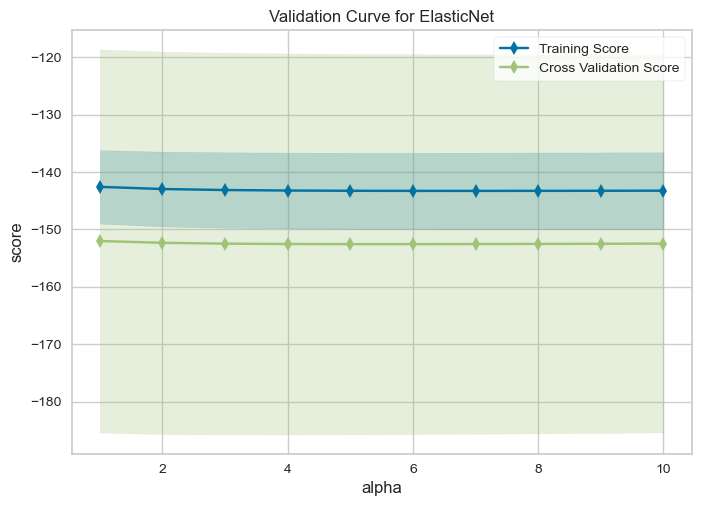

<Axes: title={'center': 'Validation Curve for ElasticNet'}, xlabel='alpha', ylabel='score'>

In [40]:
vc_mae = ValidationCurve(enr_model, X=X_train,y=y_train,param_name="alpha",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mae.fit(X=X_train,y=y_train)

vc_mae.show()


#### MAPE

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.101e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.071e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+07, toleranc

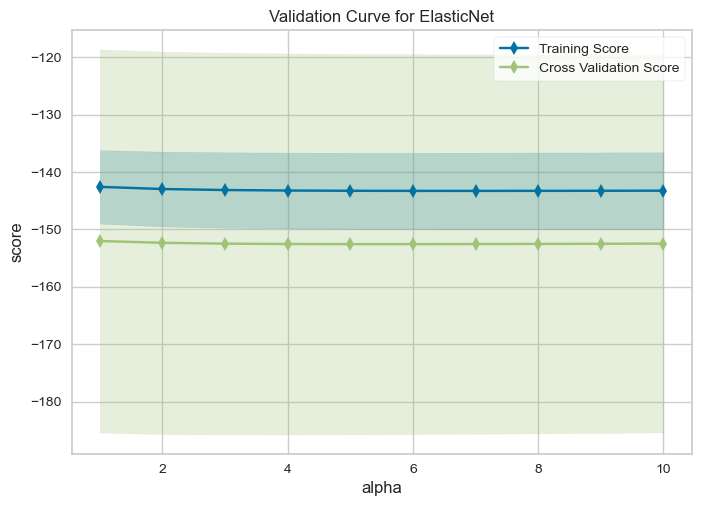

<Axes: title={'center': 'Validation Curve for ElasticNet'}, xlabel='alpha', ylabel='score'>

In [41]:

vc_mape = ValidationCurve(enr_model, X=X_train,y=y_train,param_name="alpha",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")


# Fit and show the visualizer
vc_mape.fit(X=X_train,y=y_train)

vc_mape.show()


#### RMSE

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.087e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+07, tolerance: 7.711e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.101e+07, toleranc

C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.071e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+07, tolerance: 8.187e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\lapei\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+07, toleranc

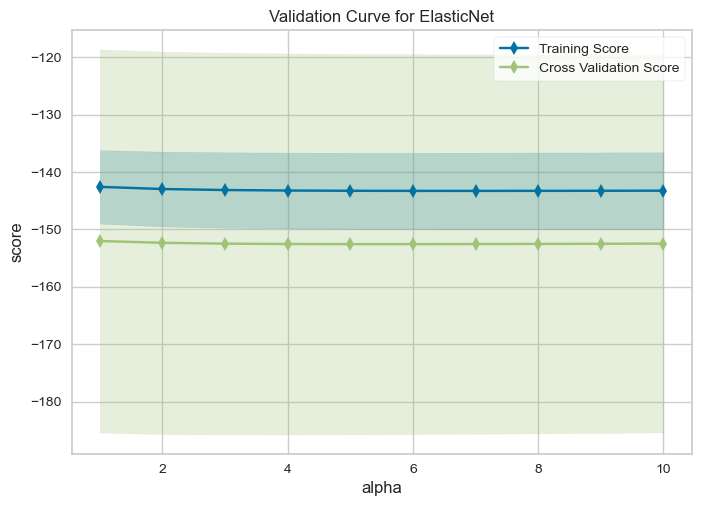

<Axes: title={'center': 'Validation Curve for ElasticNet'}, xlabel='alpha', ylabel='score'>

In [43]:
vc_rmse = ValidationCurve(enr_model, X=X_train,y=y_train,param_name="alpha",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_rmse.fit(X=X_train,y=y_train)

vc_rmse.show()

_____________________

## 3) Arvore de Decisão - Regressão

In [44]:
#biblioteca - Arvore de Decisão (regressão)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [45]:
import pylab


In [46]:
%matplotlib inline

In [47]:
X = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
y = df['qtd_abertas_Empresario_Individual']

In [48]:
#separando em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state= 42,stratify = df['porte_municipio']) # 30%

In [49]:
#list(X_train.select_dtypes(include = ['float64','int64']))

In [50]:
# https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline
# criei esse procedimento para padronizar o valor das variáveis 

#scaler = StandardScaler()

#numeric_features = list(X_train.select_dtypes(include = ['float64','int64']))

#X_train.loc[:,numeric_features] = scaler.fit_transform(X_train.loc[:,numeric_features])

#X_train.head(30)

In [51]:
#aqui eu exclui a variavel da estratificação pq vc havia dito que ela não entra na hora da predição

X_train = X_train.drop('porte_municipio', axis = 1)
X_test = X_test.drop('porte_municipio', axis = 1)

In [52]:
#max_depth = quantidade de divisões

#arvore_decisao = DecisionTreeRegressor(max_depth= 20, random_state= 42) 
arvore_decisao = DecisionTreeRegressor(min_samples_leaf = 3 , random_state= 42)

In [53]:
arvore_decisao.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=3, random_state=42)

In [54]:
#train_pred_arv_decisao = arvore_decisao.predict(X_train)
#train_av = np.sqrt (mean_squared_error (y_train, train_pred_arv_decisao))

#test_pred_arv_decisao = arvore_decisao.predict(X_test)
#test_av = np.sqrt (mean_squared_error (y_test, test_pred_arv_decisao))

#print("train av:", train_av)
#print("test av:",  test_av)

In [55]:
test_pred = arvore_decisao.predict(X_test)
train_pred = arvore_decisao.predict(X_train)

#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 113.78189686924493
test MAE: 156.72169230769234
train MAPE: 0.3674683202091031
test MAPE: 0.7013982699186898
train RMSE: 2699.4573431576255
test RMSE: 884.2034540942451


In [56]:
#Dependendo do max_depth e do min_samples_leaf muito grandes, a visualização fica ruim

#pylab aumenta a vizual da figura
#pylab.figure(figsize=(80,60))

#plot do infrografico
#plot_tree(arvore_decisao, feature_names = X_train.columns)

### Validação Cruzada 

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [58]:
arvore_decisao = DecisionTreeRegressor(min_samples_leaf = 3 , random_state= 42)

In [59]:
kfold =  KFold(n_splits = 5, shuffle= True, random_state= 42)

cv_mae = cross_val_score (arvore_decisao, X, y, cv = kfold, scoring='neg_mean_absolute_error')
cv_mape = cross_val_score (arvore_decisao, X, y, cv = kfold, scoring='neg_mean_absolute_percentage_error')
cv_rmse = cross_val_score (arvore_decisao, X, y, cv = kfold, scoring='neg_mean_squared_error')

print("MAE:",-cv_mae)
print("MAPE:",-cv_mape)
print("RMSE:",-cv_rmse)

MAE: [129.24245961 368.48717834 143.01626272 136.62710952 139.8051167 ]
MAPE: [0.48379252 0.47471734 0.47097983 0.5193421  0.46167975]
RMSE: [  918166.20935268 32832360.07816053   270197.46016233   861329.56986934
   493997.18106174]


### GridSearch

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parametros = {'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


arvore_decisao = DecisionTreeRegressor(random_state= 42)

grid_mae = GridSearchCV(estimator = arvore_decisao, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_error')
grid_mape = GridSearchCV(estimator = arvore_decisao, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_percentage_error') 
grid_rmse = GridSearchCV(estimator = arvore_decisao, param_grid = parametros, cv = 10,scoring='neg_mean_squared_error') 

grid_mae.fit(X_train, y_train)
grid_mape.fit(X_train, y_train)
grid_rmse.fit(X_train, y_train)


print("MAE - melhor parametro:{0}".format(grid_mae.best_params_))
print("MAE - melhor score:{0}".format(grid_mae.best_score_))

print("MAPE - melhor parametro:{0}".format(grid_mape.best_params_))
print("MAPE - melhor score:{0}".format(grid_mape.best_score_))

print("RMSE - melhor parametro:{0}".format(grid_rmse.best_params_))
print("RMSE - melhor score:{0}".format(grid_rmse.best_score_))

MAE - melhor parametro:{'max_depth': 9, 'min_samples_leaf': 1}
MAE - melhor score:-196.80925518458042
MAPE - melhor parametro:{'max_depth': 10, 'min_samples_leaf': 6}
MAPE - melhor score:-0.471912752265019
RMSE - melhor parametro:{'max_depth': 8, 'min_samples_leaf': 1}
RMSE - melhor score:-11623134.85676808


### Curva de Validação

#### MAE

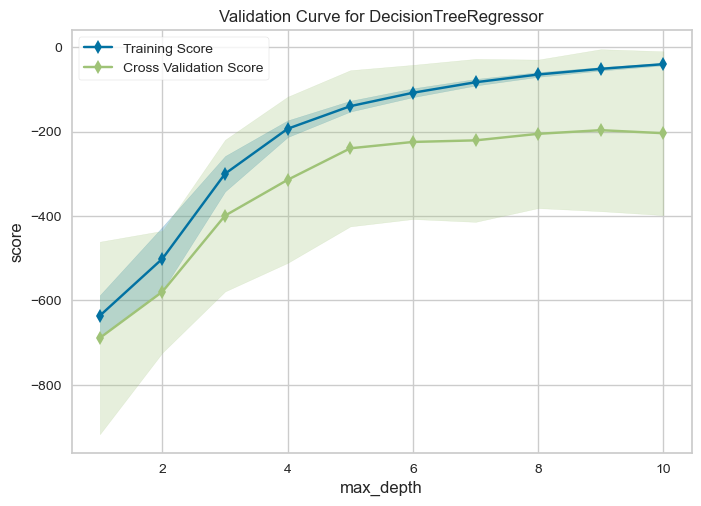

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [62]:
from yellowbrick.model_selection import ValidationCurve

# Load a regression dataset

vc_mae = ValidationCurve(arvore_decisao, X=X_train,y=y_train,param_name="max_depth",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mae.fit(X=X_train,y=y_train)

vc_mae.show()

#### MAPE

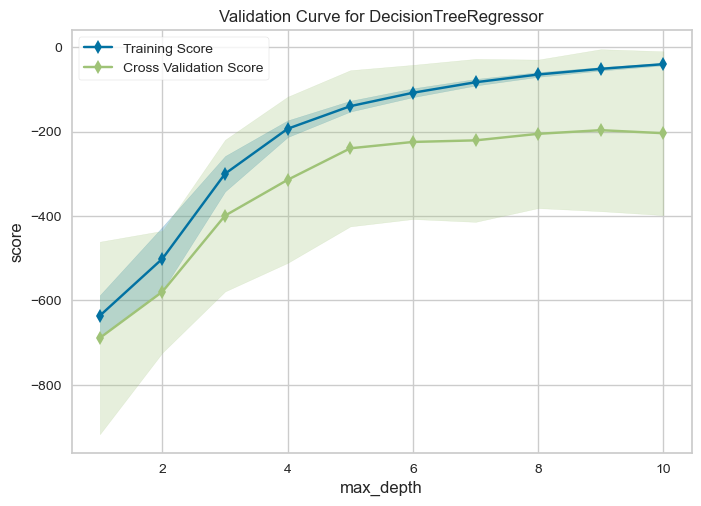

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [63]:
vc_mape = ValidationCurve(arvore_decisao, X=X_train,y=y_train,param_name="max_depth",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mape.fit(X=X_train,y=y_train)

vc_mape.show()


#### RMSE

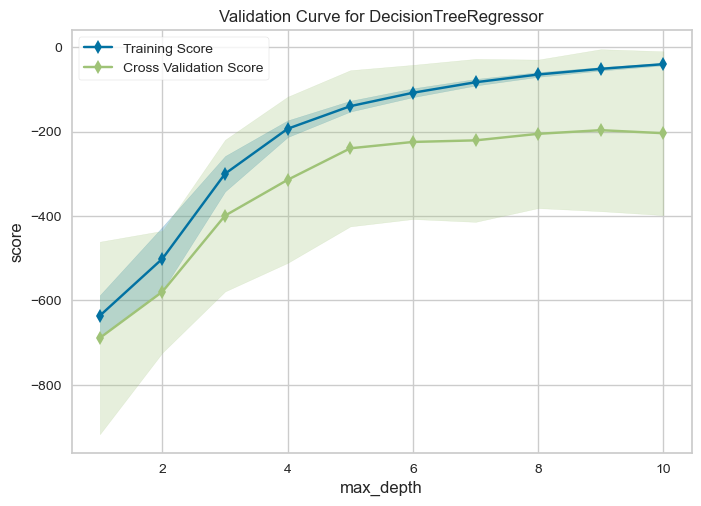

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [64]:
vc_rmse = ValidationCurve(arvore_decisao, X=X_train,y=y_train,param_name="max_depth",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_rmse.fit(X=X_train,y=y_train)

vc_rmse.show()

------------------------------------------------------------------------------------------------------------------------------

## 4) Xgboost- Regressão

In [199]:
#conda install -c conda-forge xgboost

In [65]:
#bibliotecas

import os,sys
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [66]:
X = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
y = df['qtd_abertas_Empresario_Individual']

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state= 42,stratify = df['porte_municipio']) # 30%

In [68]:
#aqui eu exclui a variavel da estratificação pq vc havia dito que ela não entra na hora da predição

X_train = X_train.drop('porte_municipio', axis = 1)
X_test = X_test.drop('porte_municipio', axis = 1)

In [69]:
xg = XGBRegressor(learning_rate = 0.6, n_estimators=100, max_depth=2, random_state= 42)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [70]:
#train_prev_xg_reg = xg.predict(X_train)
#train_xg = np.sqrt(mean_squared_error(y_train, train_prev_xg_reg))

#test_prev_xg_reg = xg.predict(X_test)
#test_xg = np.sqrt(mean_squared_error(y_test, test_prev_xg_reg))

#print("train xg:", train_xg)
#print("test xg:",  test_xg)

In [71]:
test_pred = xg.predict(X_test)
train_pred = xg.predict(X_train)

#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 52.939947614114914
test MAE: 142.34813368163717
train MAPE: 0.7488857673066155
test MAPE: 0.7766837711006876
train RMSE: 91.45277444775087
test RMSE: 1160.7034348135235


### Validação Cruzada

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [73]:
xg = XGBRegressor(learning_rate = 0.6, n_estimators=100, max_depth=2, random_state= 42)

In [74]:
kfold =  KFold(n_splits = 5, shuffle= True, random_state= 42)

cv_mae = cross_val_score (xg, X, y, cv = kfold, scoring='neg_mean_absolute_error')
cv_mape = cross_val_score (xg, X, y, cv = kfold, scoring='neg_mean_absolute_percentage_error')
cv_rmse = cross_val_score (xg, X, y, cv = kfold, scoring='neg_mean_squared_error')

print("MAE:",-cv_mae)
print("MAPE:",-cv_mape)
print("RMSE:",-cv_rmse)

MAE: [118.1021723  304.03579175 114.47264456 111.64772482 122.48758614]
MAPE: [0.55192745 0.58572723 0.5627226  0.58760226 0.52041718]
RMSE: [  607953.9675294  25934391.73077437   149221.30343471   926337.10113867
   374190.7874803 ]


### GridSearch

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parametros = {'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
              'n_estimators':[50,100,150]}

xg = XGBRegressor(random_state= 42)

grid_mae = GridSearchCV(estimator = xg, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_error')
grid_mape = GridSearchCV(estimator = xg, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_percentage_error') 
grid_rmse = GridSearchCV(estimator = xg, param_grid = parametros, cv = 10,scoring='neg_mean_squared_error') 

grid_mae.fit(X_train, y_train)
grid_mape.fit(X_train, y_train)
grid_rmse.fit(X_train, y_train)


print("MAE - melhor parametro:{0}".format(grid_mae.best_params_))
print("MAE - melhor score:{0}".format(grid_mae.best_score_))

print("MAPE - melhor parametro:{0}".format(grid_mape.best_params_))
print("MAPE - melhor score:{0}".format(grid_mape.best_score_))

print("RMSE - melhor parametro:{0}".format(grid_rmse.best_params_))
print("RMSE - melhor score:{0}".format(grid_rmse.best_score_))

MAE - melhor parametro:{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
MAE - melhor score:-170.22013270924103
MAPE - melhor parametro:{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
MAPE - melhor score:-0.3849216267180442
RMSE - melhor parametro:{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 150}
RMSE - melhor score:-12756576.866327962


### Curva de Validação

#### MAE

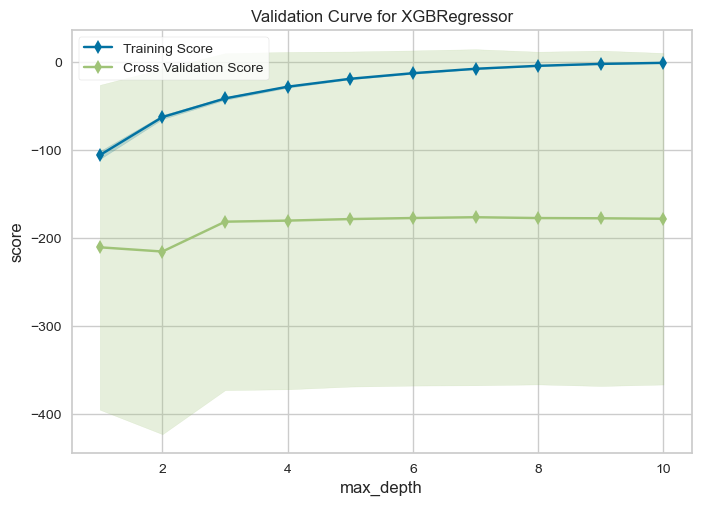

<Axes: title={'center': 'Validation Curve for XGBRegressor'}, xlabel='max_depth', ylabel='score'>

In [77]:
from yellowbrick.model_selection import ValidationCurve

vc_mae = ValidationCurve(xg, X=X_train,y=y_train,param_name="max_depth",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mae.fit(X=X_train,y=y_train)

vc_mae.show()


#### MAPE

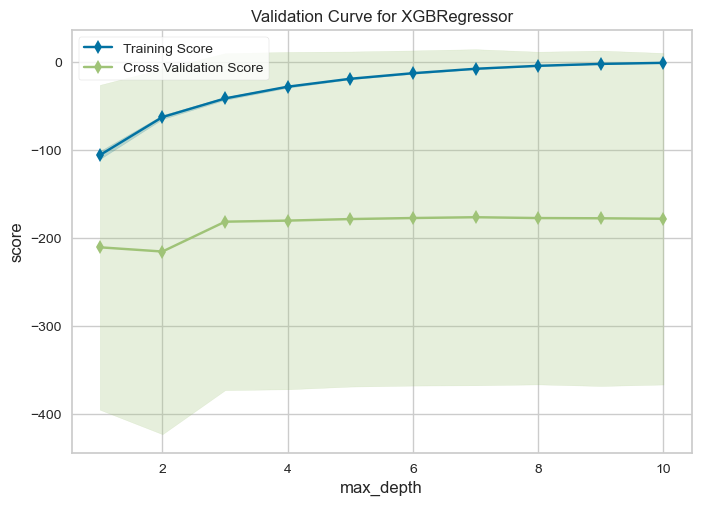

<Axes: title={'center': 'Validation Curve for XGBRegressor'}, xlabel='max_depth', ylabel='score'>

In [78]:
vc_mape = ValidationCurve(xg, X=X_train,y=y_train,param_name="max_depth",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mape.fit(X=X_train,y=y_train)

vc_mape.show()


#### RMSE

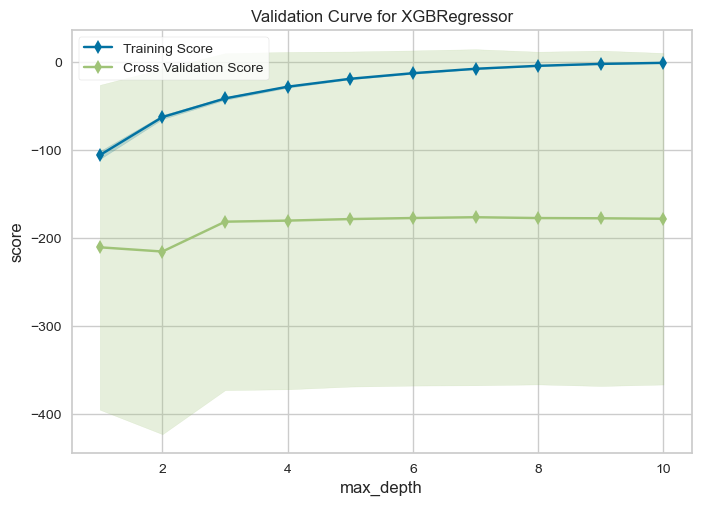

<Axes: title={'center': 'Validation Curve for XGBRegressor'}, xlabel='max_depth', ylabel='score'>

In [79]:
vc_rmse = ValidationCurve(xg, X=X_train,y=y_train,param_name="max_depth",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_rmse.fit(X=X_train,y=y_train)

vc_rmse.show()


__________________________

## 5) Random Forest - Regressão

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [81]:
X = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
y = df['qtd_abertas_Empresario_Individual']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state= 42,stratify = df['porte_municipio']) # 30%

In [83]:
#aqui eu exclui a variavel da estratificação pq vc havia dito que ela não entra na hora da predição

X_train = X_train.drop('porte_municipio', axis = 1)
X_test = X_test.drop('porte_municipio', axis = 1)

In [84]:
rf = RandomForestRegressor(n_estimators= 50, min_samples_leaf = 3, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=50, random_state=42)

In [85]:
#train_prev_rf_reg = rf.predict(X_train)
#train_rf = np.sqrt(mean_squared_error(y_train, train_prev_rf_reg))

#test_prev_rf_reg = rf.predict(X_test)
#test_rf = np.sqrt(mean_squared_error(y_test, test_prev_rf_reg)) 

#print("train RF:", train_rf)
#print("test RF:",  test_rf)

In [86]:
test_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 117.60289130521107
test MAE: 122.60581971350585
train MAPE: 0.4352261469129342
test MAPE: 0.6219123534744436
train RMSE: 2846.430889945074
test RMSE: 833.7316205244981


### Validação Cruzada 

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [88]:
rf = RandomForestRegressor(n_estimators= 100, min_samples_leaf = 2, random_state = 42)

In [89]:
kfold =  KFold(n_splits = 5, shuffle= True, random_state= 42)

cv_mae = cross_val_score (rf, X, y, cv = kfold, scoring='neg_mean_absolute_error')
cv_mape = cross_val_score (rf, X, y, cv = kfold, scoring='neg_mean_absolute_percentage_error')
cv_rmse = cross_val_score (rf, X, y, cv = kfold, scoring='neg_mean_squared_error')

print("MAE:",-cv_mae)
print("MAPE:",-cv_mape)
print("RMSE:",-cv_rmse)

MAE: [ 86.2474121  302.90256303  97.81380979 100.23085374  89.71293227]
MAPE: [0.38257149 0.37807479 0.37641078 0.39981146 0.35935202]
RMSE: [  274607.21191124 34617378.59534708   150097.93679104   294699.44489887
   171049.92543611]


### GridSearch

In [90]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros = {'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [50, 100, 150]}


rf = RandomForestRegressor(random_state = 42)

grid_mae = GridSearchCV(estimator = rf, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_error')
grid_mape = GridSearchCV(estimator = rf, param_grid = parametros, cv = 10,scoring='neg_mean_absolute_percentage_error') 
grid_rmse = GridSearchCV(estimator = rf, param_grid = parametros, cv = 10,scoring='neg_mean_squared_error') 

grid_mae.fit(X_train, y_train)
grid_mape.fit(X_train, y_train)
grid_rmse.fit(X_train, y_train)


print("MAE - melhor parametro:{0}".format(grid_mae.best_params_))
print("MAE - melhor score:{0}".format(grid_mae.best_score_))

print("MAPE - melhor parametro:{0}".format(grid_mape.best_params_))
print("MAPE - melhor score:{0}".format(grid_mape.best_score_))

print("RMSE - melhor parametro:{0}".format(grid_rmse.best_params_))
print("RMSE - melhor score:{0}".format(grid_rmse.best_score_))

### Curva de Validação

#### MAE

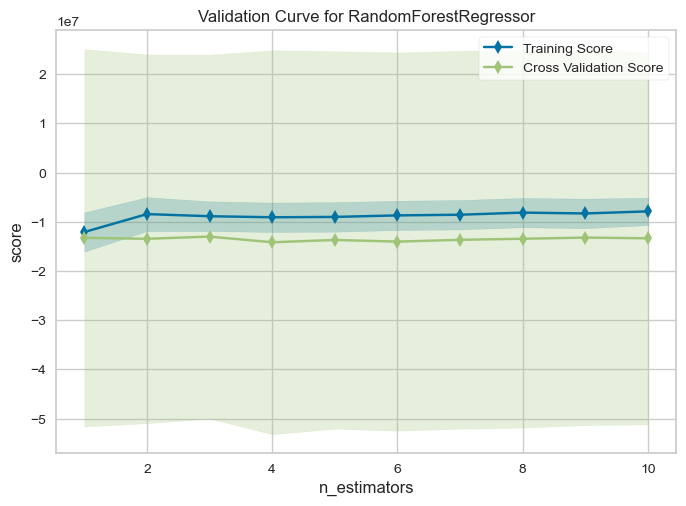

<Axes: title={'center': 'Validation Curve for RandomForestRegressor'}, xlabel='n_estimators', ylabel='score'>

In [137]:
from yellowbrick.model_selection import ValidationCurve

# Load a regression dataset

vc_mae = ValidationCurve(rf, X=X_train,y=y_train,param_name="n_estimators",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mae.fit(X=X_train,y=y_train)

vc_mae.show()


#### MAPE

In [ ]:
vc_mape = ValidationCurve(rf, X=X_train,y=y_train,param_name="n_estimators",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_mape.fit(X=X_train,y=y_train)


vc_mape.show()


#### RMSE

In [ ]:
vc_rmse = ValidationCurve(rf, X=X_train,y=y_train,param_name="n_estimators",param_range=np.arange(1, 11),
                         cv=10, scoring="neg_mean_absolute_error")

# Fit and show the visualizer
vc_rmse.fit(X=X_train,y=y_train)


vc_rmse.show()

## Shape Values

**Obs: O modelo que pareceu ser melhor, foi o Elastic net... estou tentando fazer o shape Values pra ele, mas esta ainda dados alguns erros. Estou verificando isso...**

In [113]:
#!pip install shap


In [138]:
import shap

#vizualizador 
shap.initjs()

In [140]:
enr_model = ElasticNet(alpha = 0.5, l1_ratio = 0.9, random_state= 42)

enr_model.fit(X_train, y_train)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.417e+07, tolerance: 8.254e+06


ElasticNet(alpha=0.5, l1_ratio=0.9, random_state=42)

In [ ]:
shape_teste =shap.KernelExplainer(enr_model.predict,X_train)
valores_shap = shape_teste.shap_values(X_train)

X does not have valid feature names, but ElasticNet was fitted with feature names
Using 3620 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/3620 [00:00<?, ?it/s]

X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have 

X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have valid feature names, but ElasticNet was fitted with feature names
X does not have 

In [77]:
shape_teste

In [78]:
valores_shap[0].shape

(29,)

In [79]:
shap.initjs() # no google colab, precisa colocar esse comando em todas as células que tiver uma vizualização para poder ver o resultado
shap.force_plot(shape_teste.expected_value[0], valores_shap[0][0,:], X_train.iloc[0,:])

IndexError: invalid index to scalar variable.

In [ ]:
shap.initjs()
shap.force_plot(shape_teste.expected_value[0], valores_shap[0], X_train)

In [ ]:
shap.initjs()
shap.summary_plot(valores_shap[0], X_train)

In [ ]:
#shap.initjs()
#interaction_index = None -> apresenta uma das features e sua na previsão
#shap.dependence_plot("", valores_shap[0], X_train, interaction_index = "")

In [ ]:
shap.initjs()
shap.summary_plot(valores_shap, X_treino, plot_type='bar')